# 1. Decision Tree Algorithm
A decision tree is a `supervised machine learning` algorithm used for both classification and regression tasks. It works by splitting the data into subsets based on the value of input features, creating a tree-like model of decisions.

It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.


<img src="structure-of-a-decision-tree.png" alt="Structure of a Decision Tree" width="400"/>

### 1.1. Important Terms for Decision Tree
- **Root Node**: It represents the entire dataset, which further gets divided into two or more homogeneous sets.

- **Splitting**:  It is a process of `dividing` a node into two or more sub-nodes.

- **Decision Node**: When a sub-node `splits` into further sub-nodes, then it is called the decision node.

- **Leaf/Terminal Node**: Nodes that `do not split` are called Leaf or Terminal nodes.

- **Pruning**: It is the process of removing sub-nodes of a decision node, this is the opposite of splitting. It is opposite of splitting.

- **Entropy**: It is the measure of `randomness` or `impurity` in the dataset. The higher the entropy, the more mixed the data is. The lower the entropy, the more homogeneous the data is.

- **Information Gain**: The `information gain` is based on the `decrease in entropy` after a dataset is split on an attribute. Constructing a decision tree is all about finding attribute that returns the highest information gain (i.e., the most homogeneous branches).

- **Gini Index**: Gini index says, if we select two items from a population at random then they must be of the same class and probability for this is 1 if the population is pure.

In [14]:
import math

In [15]:
# Example dataset, let's say we have a binary classification problem
# Suppose in a dataset of 100 elements, 40 are of class A and 60 are of class B

# Number of elements in each class
n_A = 40
n_B = 60
total = n_A + n_B
total

100

In [16]:
#Now let's calculate the proportion of each class
p_A = n_A / total
p_B = n_B / total
print(f"Proportion of class A: {p_A}, Proportion of class B: {p_B}") 
#p_A and p_B are the prior probabilities of each class  

Proportion of class A: 0.4, Proportion of class B: 0.6


In [17]:
# NOW let's calculate the entropy of this dataset
entropy = - (p_A * math.log2(p_A) + p_B * math.log2(p_B))
print(f"Entropy of the dataset: {entropy}")

Entropy of the dataset: 0.9709505944546686


In [18]:
# Gini impurity can also be calculated as follows:
gini_impurity = 1 - (p_A**2 + p_B**2)
print(f"Gini Impurity of the dataset: {gini_impurity}")

Gini Impurity of the dataset: 0.48


In [19]:
# Information Gain
# Assuming a split that results in two subsets with the following class distributions:
# Subset 1: 30 of class A, 10 of class B
# Subset 2: 10 of class A, 50 of class B
n1_A, n1_B = 30, 10
n2_A, n2_B = 10, 50
total1 = n1_A + n1_B
total2 = n2_A + n2_B
p1_A, p1_B = n1_A / total1, n1_B / total1
p2_A, p2_B = n2_A / total2, n2_B / total2
entropy1 = - (p1_A * math.log2(p1_A) + p1_B * math.log2(p1_B))
entropy2 = - (p2_A * math.log2(p2_A) + p2_B * math.log2(p2_B))
information_gain = entropy - (total1 / total) * entropy1 - (total2 / total) * entropy2
print(f"Information Gain: {information_gain}")

Information Gain: 0.256425891682003


Based on our example dataset with two classes (A and B), we have calculated the following values:
1. **Entropy of the dataset**: 0.9709505944546686. This value indicates a moderate level of disorder in the dataset, considering that it's not very close to 0 (which would mean no disorder) and not at its maximum (which would mean complete disorder for a binary classification)

2. **Gini Impurity of the dataset**: 0.48. Less than 0.5, this value indicates a moderate level of impurity in the dataset, as it is not close to 0 (which would mean pure classes) and not at its maximum (which would mean maximum impurity for a binary classification).

3. **Information Gain**: The information gain from a split would depend on how the dataset is divided based on a specific feature. It is calculated by subtracting the weighted entropy of the child nodes from the entropy of the parent node. Without a specific split, we cannot calculate the information gain.


----

# 2. Decsision Tree Example in Python

In [20]:
# import Libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [21]:
# load the dataset
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [22]:
df.isnull().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

In [23]:
# drop deck column
df.drop('deck', axis=1, inplace=True)

#impute missing values of age, and fare using median
imputer = SimpleImputer(strategy='median')
df[['age', 'fare']] = imputer.fit_transform(df[['age', 'fare']])

# impute missing values of embark and embarked_town using mode
imputer = SimpleImputer(strategy='most_frequent')
df[['embark_town', 'embarked']] = imputer.fit_transform(df[['embark_town', 'embarked']])

In [24]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  891 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


In [26]:
# Encode the categorical and object variables using for loop and labelencoder
le = LabelEncoder()
for col in df.select_dtypes(include=['category', 'object']):
    df[col] = le.fit_transform(df[col])

In [27]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,True,2,0,False
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,0,1,False
2,1,3,0,26.0,0,0,7.9250,2,2,2,False,2,1,True
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,2,1,False
4,0,3,1,35.0,0,0,8.0500,2,2,1,True,2,0,True


In [28]:
# Split the data into X and y
X = df.drop(['survived', 'alive'], axis=1)
y = df['survived']
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Create and train the model
model = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=3)
model.fit(X_train, y_train)

# predict the mdoel
y_pred = model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_test, y_pred))

[[92 19]
 [13 55]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



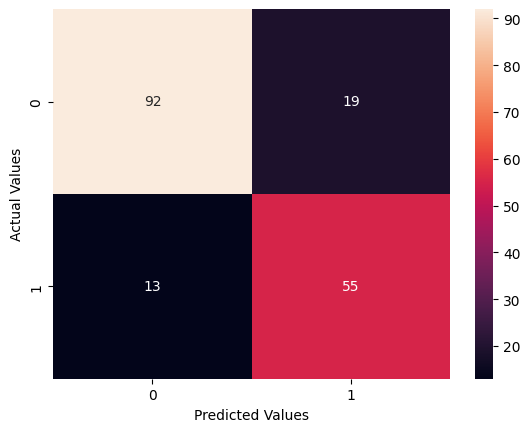

In [31]:
# Plot the confusion matrix
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, fmt='d')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [32]:
# save the decision tree classifier
from sklearn.tree import export_graphviz
export_graphviz(model, out_file='./saved_models/03_Decision_Tree.dot', feature_names=X.columns, filled=True, rounded=True)

---

#### Assigment: Use the Decision Tree as a Regression Model Algorithm 

In [37]:
# to use the Decision Tree as a Regression Model Algorithm
from sklearn.tree import DecisionTreeRegressor

# Split the data into X and y
X = df.drop(['fare'], axis=1)
y = df['fare']


# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create and train the model
model = DecisionTreeRegressor(criterion='squared_error', random_state=42, max_depth=3)
model.fit(X_train, y_train)


# predict the mdoel
y_pred = model.predict(X_test)


# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")



Mean Squared Error: 900.4927437361115
R^2 Score: 0.41807192234882307
